### Student Information
Name:龔祺竣

Student ID:D1124181010

GitHub ID:anku0910

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [1]:
### Begin Assignment Here

## 1. The Data

Nothing.

## 2. Data Preparation

In [2]:
import pandas as pd
import numpy as np
from sklearn.utils import Bunch

data = pd.read_csv('senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')  # Load
categories = data['sentiment'].unique()  # Extract sentiment categories

data['sentiment'] = pd.Categorical(data['sentiment'], categories=categories)  # Convert sentiment column to categorical
data['sentiment'] = data['sentiment'].cat.codes  # Convert to numerical code

X = data['comment'].values 
y = data['sentiment'].values  

sentiment1 = Bunch(data=X, target=y, feature_names=['text'], target_names=categories)  # Create a structured dataset for view
sentiment1.data[0:2]

array(['He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.',
       'The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel'],
      dtype=object)

In [3]:
for t in sentiment1.target[:10]:
    print(sentiment1.target_names[t])

not nostalgia
nostalgia
nostalgia
not nostalgia
nostalgia
nostalgia
nostalgia
nostalgia
not nostalgia
not nostalgia


In [4]:
len(sentiment1.data)

1500

### **>>> Exercise 1 (Watch Video):**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [5]:
# Answer here
for text in sentiment1.data[:3]:
    print(text)

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.


## 3. Data Transformation

### 3.1 Converting Dictionary into Pandas Dataframe

In [6]:
import helpers.data_mining_helpers as dmh

X = pd.DataFrame.from_records(dmh.format_rows(sentiment1), columns= ['text'])

In [7]:
len(X)

1500

In [8]:
X[0:8]

,text
0,He was a singer with a golden voice that I lov...
1,The mist beautiful voice ever I listened to hi...
2,I have most of Mr. Reeves songs. Always love ...
3,30 day leave from 1st tour in Viet Nam to conv...
4,listening to his songs reminds me of my mum wh...
5,"Every time I heard this song as a child, I use..."
6,"My dad loved listening to Jim Reeves, when I w..."
7,i HAVE ALSO LISTENED TO Jim Reeves since child...


### Adding Columns

In [9]:
X['category'] = sentiment1.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, sentiment1))

In [10]:
X[0:10]

,text,category,category_name
0,He was a singer with a golden voice that I lov...,0,not nostalgia
1,The mist beautiful voice ever I listened to hi...,1,nostalgia
2,I have most of Mr. Reeves songs. Always love ...,1,nostalgia
3,30 day leave from 1st tour in Viet Nam to conv...,0,not nostalgia
4,listening to his songs reminds me of my mum wh...,1,nostalgia
5,"Every time I heard this song as a child, I use...",1,nostalgia
6,"My dad loved listening to Jim Reeves, when I w...",1,nostalgia
7,i HAVE ALSO LISTENED TO Jim Reeves since child...,1,nostalgia
8,Wherever you are you always in my heart,0,not nostalgia
9,Elvis will always be number one no one can com...,0,not nostalgia


### 3.2 Familiarizing yourself with the Data


In [11]:
# a simple query
X[:10][["text","category_name"]]

,text,category_name
0,He was a singer with a golden voice that I lov...,not nostalgia
1,The mist beautiful voice ever I listened to hi...,nostalgia
2,I have most of Mr. Reeves songs. Always love ...,nostalgia
3,30 day leave from 1st tour in Viet Nam to conv...,not nostalgia
4,listening to his songs reminds me of my mum wh...,nostalgia
5,"Every time I heard this song as a child, I use...",nostalgia
6,"My dad loved listening to Jim Reeves, when I w...",nostalgia
7,i HAVE ALSO LISTENED TO Jim Reeves since child...,nostalgia
8,Wherever you are you always in my heart,not nostalgia
9,Elvis will always be number one no one can com...,not nostalgia


In [12]:
X[-10:]

,text,category,category_name
1490,"He really isn't my cup of tea, but some of his...",0,not nostalgia
1491,real music...how i miss those days...brings ba...,1,nostalgia
1492,i used to cry over this song cause i had a boy...,1,nostalgia
1493,"He really has that ""love you like a brother"" l...",0,not nostalgia
1494,That's funny. But Leo really is a nice guy. He...,0,not nostalgia
1495,"i don't know!..but the opening of the video,.....",0,not nostalgia
1496,it's sad this is such a beautiful song when yo...,0,not nostalgia
1497,"Dear Friend, I think age and time is not that ...",0,not nostalgia
1498,I was born in 1954 and started to be aware of ...,1,nostalgia
1499,This is the first CD I bought after my marriag...,1,nostalgia


In [13]:
# using loc (by label)
X.loc[:10, 'text']

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
Name: text, dtype: object

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [14]:
#Answer here
print(X[X['category_name']!='nostalgia'].iloc[::10][0:2])

                                                 text  category  category_name
0   He was a singer with a golden voice that I lov...         0  not nostalgia
24  I like the part I'm a steam roller baby guaran...         0  not nostalgia


### **>>> Exercise 3 (Watch Video):**  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [15]:
# Answer here
print(X[X['category_name']=='nostalgia'].iloc[::10][0:5])

                                                 text  category category_name
1   The mist beautiful voice ever I listened to hi...         1     nostalgia
18  My Grandparents had a pub in the 1970's, this ...         1     nostalgia
32  I remember my Mom listening to Jim over and ov...         1     nostalgia
50  If I remember correctly, this song came out af...         1     nostalgia
71  Gosh does this bring back memories. Nearly eve...         1     nostalgia


## 4. Data Mining using Pandas

### 4.1 Missing Values

In [16]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### >>> **Exercise 4 (Watch Video):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [17]:
# Answer here
X.isnull().apply(lambda X: dmh.check_missing_values(X),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

### >>> **Exercise 5 (take home)** 
$Hint$ :  why `.isnull()` didn't work?

### 4.2 Dealing with Duplicate Data

In [18]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [19]:
sum(X.duplicated())

1

In [20]:
sum(X.duplicated('text'))

1

In [21]:
len(X)

1500

In [22]:
X.drop_duplicates(keep="first", inplace=True) 

In [23]:
len(X)

1499

In [24]:
sum(X.duplicated())

0

## 5.  Data Preprocessing

In [25]:
X.category_name.value_counts()

category_name
nostalgia        750
not nostalgia    749
Name: count, dtype: int64

### 5.1 Sampling

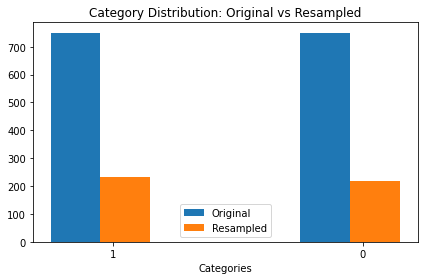

In [26]:
X_resampled = X.sample(n=450)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to plot the category distribution for both original and resampled data 
def plot_category_distribution(original_data, resampled_data):
    """ 
    Function to plot the category distribution for both original and resampled data 
    """
    # Convert data to DataFrame
    original_df = pd.DataFrame(original_data, columns=["category"])
    resampled_df = pd.DataFrame(resampled_data, columns=["category"])

    # Calculate value counts for original and resampled data
    original_count = original_df['category'].value_counts()
    resampled_count = resampled_df['category'].value_counts()

    # Define categories and index for plotting
    categories = original_count.index.tolist()  # Extract categories from the data
    index = np.arange(len(categories))

    # Create a bar plot for original and resampled data
    plt.bar(index, original_count.values, width=0.2, label='Original', align='center')
    plt.bar(index + 0.2, resampled_count.values, width=0.2, label='Resampled', align='center')

    # Set x-axis ticks and labels
    plt.xticks(index + 0.15, categories)
    plt.xlabel('Categories')
    plt.title('Category Distribution: Original vs Resampled')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_category_distribution(X, X_resampled)


### 5.2 Feature Creation

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
ngram_range=(1,1) 
X['unigrams'] = X['text'].apply(CountVectorizer(ngram_range=ngram_range).build_analyzer()) 
# Use built-in tokenizer 
list(X[0:1]['unigrams'])

[['he',
  'was',
  'singer',
  'with',
  'golden',
  'voice',
  'that',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  'although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  'but',
  'can',
  'vouch',
  'for',
  'jim',
  'reeves',
  'all',
  'the',
  'time',
  'you',
  'feel',
  'relaxed',
  'emotional',
  'and',
  'loving',
  'thank',
  'you',
  'lord',
  'for',
  'his',
  'life']]

In [28]:
X[0:4]

,text,category,category_name,unigrams
0,He was a singer with a golden voice that I lov...,0,not nostalgia,"[he, was, singer, with, golden, voice, that, l..."
1,The mist beautiful voice ever I listened to hi...,1,nostalgia,"[the, mist, beautiful, voice, ever, listened, ..."
2,I have most of Mr. Reeves songs. Always love ...,1,nostalgia,"[have, most, of, mr, reeves, songs, always, lo..."
3,30 day leave from 1st tour in Viet Nam to conv...,0,not nostalgia,"[30, day, leave, from, 1st, tour, in, viet, na..."


### 5.3 Feature subset selection

<Axes: >

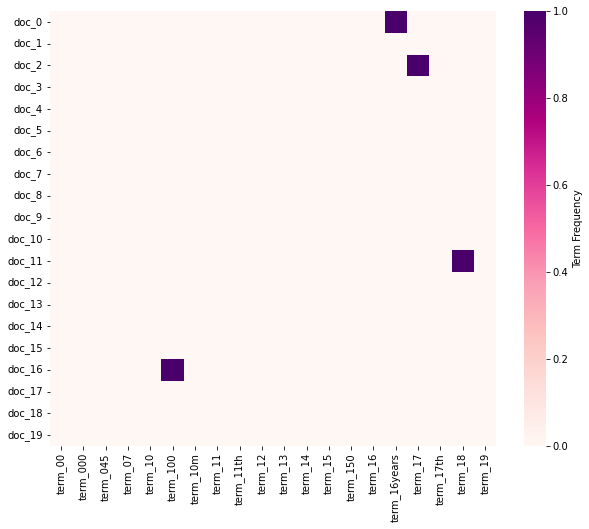

In [34]:
import seaborn as sns

plot_x = ["term_" + str(i) for i in vectorizer.get_feature_names_out()[0:20]]
plot_y = ["doc_" + str(i) for i in list(X.index)[0:20]]
plot_z = tdm[0:20, 0:20].toarray()  # Select first 20 documents and first 20 terms

# Create DataFrame for visualization
tdm_df = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

# Plot heatmap
plt.subplots(figsize=(10, 8))
sns.heatmap(tdm_df, cmap='RdPu', vmin=0, vmax=tdm_df.max().max(), annot=False, cbar_kws={'label': 'Term Frequency'})


### 5.4 Atrribute Transformation / Aggregation

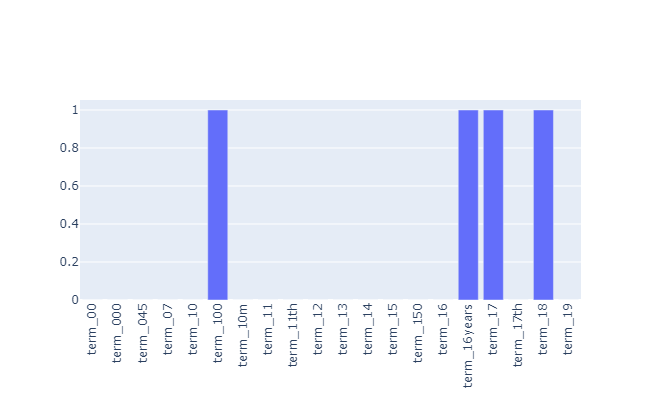

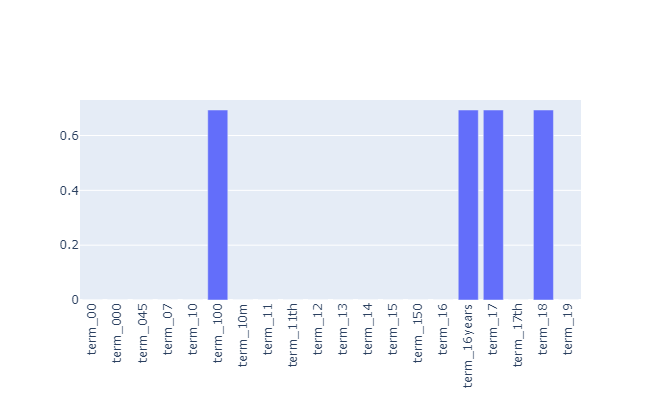

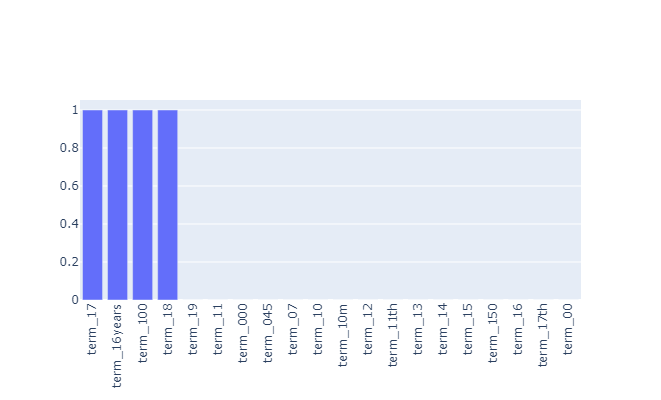

In [64]:
import plotly.graph_objects as go

# Function to plot term frequencies with optional log scale and sorting
def plot_term_frequencies(tdm_df, start_range=0, end_range=100, logScale=False, ascending=None):
    term_frequencies = tdm_df.sum(axis=0).to_numpy()  # Sum term frequencies across documents
    terms = tdm_df.columns.to_list()  # Extract column names (terms)
    
    x_values = np.asarray(terms)
    y_values = term_frequencies
    
    # Apply log scale if needed
    if logScale:
        y_values = np.log(y_values + 1)  # Log scale (add 1 to avoid log(0))

    # Sort terms based on frequency if ascending/descending is specified
    if ascending is not None:
        sorted_indices = np.argsort(y_values)
        if not ascending:
            sorted_indices = sorted_indices[::-1]  # Reverse for descending order
        x_values = x_values[sorted_indices]
        y_values = y_values[sorted_indices]

    # Plot term frequencies within the specified range
    fig = go.Figure(go.Bar(x=x_values[start_range:end_range], y=y_values[start_range:end_range]))
    
    # Update layout for better readability and interactivity
    fig.update_layout(
        width=700,
        height=400,
        xaxis=dict(tickangle=-90),
        sliders=[{
            'active': 0,
            'currentvalue': {"prefix": "Range: "},
            'steps': [
                {'label': f'{i}-{i+end_range-1}',
                 'method': 'update',
                 'args': [{'x': [x_values[i:i+end_range]], 'y': [y_values[i:i+end_range]]}]}
                for i in range(0, len(x_values), end_range)  # Step through terms in batches of `end_range`
            ]
        }]
    )
    
    fig.show()
    
plot_term_frequencies(tdm_df, start_range=0, end_range=100, logScale=False, ascending=None)  # Basic plot
plot_term_frequencies(tdm_df, start_range=0, end_range=100, logScale=True, ascending=None)  # Log scale plot
plot_term_frequencies(tdm_df, start_range=0, end_range=100, logScale=False, ascending=False)  # Sorted by frequency


### Finding frequent patterns for each category

#### Converting texts for each category to a term-document matrix

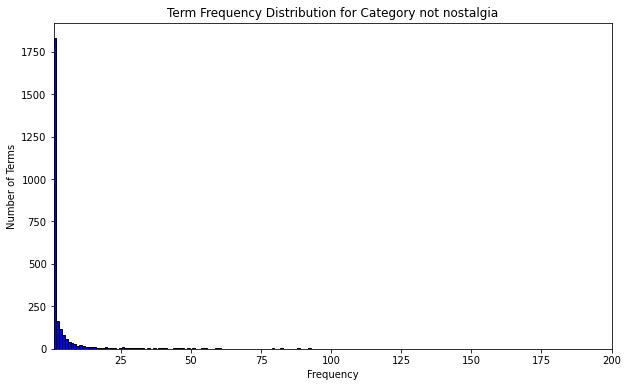

In [69]:
#Create separate DataFrames for each category
category_dfs = {}  # Dictionary to store DataFrames for each category
for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category
for category in categories:
    term_document_dfs[category] = dmh.create_term_document_df(category_dfs[category]['text'])
category_number = 0
category_name = categories[category_number]
category_word_counts = term_document_dfs[category_name].sum(axis=0).to_numpy()

plt.figure(figsize=(10, 6))
plt.hist(category_word_counts, bins=700, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {category_name}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()    

#### Filtering the bottom 1% and top 5% words from the term-document matrix

In [ ]:
# Apply the filtering function to each category texts
filt_term_document_dfs = {}
stop_words_dict = {} # collect those removed words as stop_words for CountVectorizer/TfidfVectorizer if necessary
for category in categories:
    # print(f'\nFor category {category} we filter the following words:')
    filt_term_document_dfs[category], stop_words_dict[category] = dmh.filter_top_bottom_words_by_sum(term_document_dfs[category], verbose=False)
    
# Combine all removed words lists into one, which is a list of stop words for the subsequent process (if necessary)
stop_words_list = [item for sublist in stop_words_dict.values() for item in sublist]

In [ ]:
for category_name in categories:  #You can change it from 0 to 1
    print(f"Plot of Term Frequencies for Category {category_name}")
    ta.plot_term_frequencies(filt_term_document_dfs[category_name], start_range=0, end_range=100, logScale=False, ascending=False)
    print()
    print()

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Step 1: Load data from files
def load_patterns(file_path):
    with open(file_path, 'r') as file:
        patterns = file.read().splitlines()
    return [pattern.split(":")[0].strip() for pattern in patterns]

# Load patterns from both files
nostalgia_patterns = load_patterns("freq_patterns_nostalgia_minSup9.txt")
not_nostalgia_patterns = load_patterns("freq_patterns_not_nostalgia_minSup9.txt")

# Step 2: Identify common and unique words
common_words = set(nostalgia_patterns) & set(not_nostalgia_patterns)
unique_nostalgia = set(nostalgia_patterns) - common_words
unique_not_nostalgia = set(not_nostalgia_patterns) - common_words

# Step 3: Frequency analysis for emotional, temporal, and descriptive words
emotional_words = ["cry", "tears", "memory", "gone", "feel", "happy", "wonderful", "sad", "amazing"]
temporal_words = ["youth", "yesterday", "growing", "1963", "today", "new", "yesterday", "forever", "before"]
descriptive_adjectives = ["classic", "fantastic", "sweet", "special", "brilliant", "lovely"]

# Count occurrences in both sets
def word_category_analysis(patterns, words):
    counter = Counter(patterns)
    return {word: counter[word] for word in words if word in counter}

nostalgia_emotions = word_category_analysis(nostalgia_patterns, emotional_words)
not_nostalgia_emotions = word_category_analysis(not_nostalgia_patterns, emotional_words)

nostalgia_temporal = word_category_analysis(nostalgia_patterns, temporal_words)
not_nostalgia_temporal = word_category_analysis(not_nostalgia_patterns, temporal_words)

nostalgia_descriptions = word_category_analysis(nostalgia_patterns, descriptive_adjectives)
not_nostalgia_descriptions = word_category_analysis(not_nostalgia_patterns, descriptive_adjectives)

# Step 4: Visualizations
def plot_wordcloud(word_dict, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)
    plt.figure(figsize=(6, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds for analysis
plot_wordcloud(nostalgia_emotions, "Nostalgia - Emotional Words")
plot_wordcloud(not_nostalgia_emotions, "Not Nostalgia - Emotional Words")
plot_wordcloud(nostalgia_temporal, "Nostalgia - Temporal References")
plot_wordcloud(not_nostalgia_temporal, "Not Nostalgia - Temporal References")
plot_wordcloud(nostalgia_descriptions, "Nostalgia - Descriptive Adjectives")
plot_wordcloud(not_nostalgia_descriptions, "Not Nostalgia - Descriptive Adjectives")

# Step 5: Display Findings
print("Common Words:", len(common_words))
print("Unique Nostalgia Words:", len(unique_nostalgia))
print("Unique Not Nostalgia Words:", len(unique_not_nostalgia))

print("\nNostalgia - Emotional Words:", nostalgia_emotions)
print("Not Nostalgia - Emotional Words:", not_nostalgia_emotions)

print("\nNostalgia - Temporal References:", nostalgia_temporal)
print("Not Nostalgia - Temporal References:", not_nostalgia_temporal)

print("\nNostalgia - Descriptive Adjectives:", nostalgia_descriptions)
print("Not Nostalgia - Descriptive Adjectives:", not_nostalgia_descriptions)

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import wordnet
from nrclex import NRCLex
import nltk
from nltk import pos_tag, word_tokenize

# Make sure to download the necessary NLTK data
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
# nltk.download('all') # totally around 3.4 GB

# Step 1: Load data from files (same as previous code)
def load_patterns(file_path):
    with open(file_path, 'r') as file:
        patterns = file.read().splitlines()
    return [pattern.split(":")[0].strip() for pattern in patterns]

# Load patterns from both files
nostalgia_patterns = load_patterns("freq_patterns_nostalgia_minSup9.txt")
not_nostalgia_patterns = load_patterns("freq_patterns_not_nostalgia_minSup9.txt")

# Step 2: Enhanced word category analysis using NRCLex for emotional words
def categorize_with_nrclex(word_list):
    emotions_dict = {'positive': [], 'negative': [], 'joy': [], 'sadness': [], 'anger': [], 'anticipation': [], 'trust': [], 'fear': [], 'surprise': [], 'disgust': []}
    for word in word_list:
        analysis = NRCLex(word)
        for emotion in emotions_dict.keys():
            if emotion in analysis.raw_emotion_scores:
                emotions_dict[emotion].append(word)
    return {k: len(v) for k, v in emotions_dict.items()}

# Step 3: Temporal Tagging - Manually defined list
temporal_words = [
    "yesterday", "today", "tomorrow", "morning", "evening", "night", "week", "month", "year", "decade", 
    "century", "past", "present", "future", "now", "then", "before", "after", "early", "late", "1963", 
    "youth", "forever", "years", "months", "days", "once", "ago"
]

def count_temporal_words(patterns, temporal_list):
    return {word: patterns.count(word) for word in temporal_list if word in patterns}

nostalgia_temporal = count_temporal_words(nostalgia_patterns, temporal_words)
not_nostalgia_temporal = count_temporal_words(not_nostalgia_patterns, temporal_words)

# Step 4: Extract Descriptive Adjectives Using POS Tagging
def extract_adjectives(word_list):
    adjectives = []
    for pattern in word_list:
        tokens = word_tokenize(pattern)
        pos_tags = pos_tag(tokens)
        adjectives.extend([word for word, tag in pos_tags if tag == 'JJ'])  # 'JJ' is the POS tag for adjectives
    return Counter(adjectives)

nostalgia_adjectives = extract_adjectives(nostalgia_patterns)
not_nostalgia_adjectives = extract_adjectives(not_nostalgia_patterns)

# Step 5: Visualizations and Findings
def plot_wordcloud(word_dict, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds for analysis
plot_wordcloud(nostalgia_temporal, "Nostalgia - Temporal References")
plot_wordcloud(not_nostalgia_temporal, "Not Nostalgia - Temporal References")

plot_wordcloud(nostalgia_adjectives, "Nostalgia - Descriptive Adjectives")
plot_wordcloud(not_nostalgia_adjectives, "Not Nostalgia - Descriptive Adjectives")

# Display Findings
print("Nostalgia Emotional Words:", categorize_with_nrclex(nostalgia_patterns))
print("Not Nostalgia Emotional Words:", categorize_with_nrclex(not_nostalgia_patterns))

print("\nNostalgia - Temporal References:", nostalgia_temporal)
print("Not Nostalgia - Temporal References:", not_nostalgia_temporal)

print("\nNostalgia - Descriptive Adjectives:", nostalgia_adjectives.most_common(10))
print("Not Nostalgia - Descriptive Adjectives:", not_nostalgia_adjectives.most_common(10))


#### Converting the filtered term-document matrix to transactional database

In [ ]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for category in filt_term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace(' ', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(filt_term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

#### Printing and visualizing stats for transactional database (for determining support threshold)

In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

#### Apply FPGrowth algorithms to finding frequent patterns for each category

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_not_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_not_nostalgia = obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
obj1.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns

print('Plot of Frequent Patterns for Category not_nostalgia')
ta.plot_frequent_patterns(frequentPatternsDF_not_nostalgia, start_range=0, end_range=50, ascending=False)

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia = obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns

print('Plot of Frequent Patterns for Category nostalgia')
ta.plot_frequent_patterns(frequentPatternsDF_nostalgia, start_range=0, end_range=50, ascending=False)

### For each category, filter the patterns to keep only the unique ones

In [ ]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_not_nostalgia, frequentPatternsDF_nostalgia]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

In [ ]:
# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
len(unique_patterns)

In [ ]:
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

# Display the final pattern result
print('Plot of Unique Frequent Patterns')
ta.plot_frequent_patterns(final_pattern_df, start_range=0, end_range=50, ascending=False)

### Transform the texts into the frequency-based term-document matrix

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# By adding stop_words into CountVectorizer, in this dataset, the dimension can be reduced from 3730 to 3520.
# After experiments, this is not helpful for improving the classification performance. As a result, I commented the following line.
# vectorizer = CountVectorizer(stop_words=stop_words_list)

# Convert 'text' column into term-document matrix using CountVectorizer
count_vectorizer = CountVectorizer()
tokenizer = count_vectorizer.build_analyzer()

# don't forget the index parameter for consistent indexing, especially for concating two dataframes
tdm_df = dmh.create_term_document_df(X['text'], vectorizer=count_vectorizer, index=X.index)
tdm_df

### Transform the texts into the TF-IDF-based term-document matrix

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert 'text' column into tf-idf-based term-document matrix using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# don't forget the index parameter for consistent indexing, especially for concating two dataframes
tfidf_tdm_df = dmh.create_term_document_df(X['text'], vectorizer=tfidf_vectorizer, index=X.index)
tfidf_tdm_df

### Transform the unique patterns into the 0/1 patterm-document matrix

In [ ]:
# tokenize text into words and then convert to a set representation
X['tokenized_text'] = X['text'].apply(tokenizer).apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words and then convert to a set representation
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)
    
pattern_matrix

### Concatenate the frequence-based term-document matrix and the pattern matrix to augment the features

In [ ]:
# Concatenate the original TDM and the pattern matrix to augment the features
augmented_tdm_df = pd.concat([tdm_df, pattern_matrix], axis=1)
augmented_tdm_df

### Concatenate the tf-idf-based term-document matrix and the pattern matrix to augment the features

In [ ]:
# Concatenate the original TDM and the pattern matrix to augment the features
augmented_tfidf_tdm_df = pd.concat([tfidf_tdm_df, pattern_matrix], axis=1)
augmented_tfidf_tdm_df

### 5.5 Dimensionality Reduction

In [ ]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# Define a function to create a scatter plot for each method
def plot_scatter_2d(ax, X_reduced, title, colors, categories):
    for c, category in zip(colors, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Define a function to create a 3D scatter plot for each method
def plot_scatter_3d(ax, X_reduced, title, colors, categories):
    for c, category in zip(colors, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

#### Apply dimensionality reduction to the frequency-based term-document matrix and keep 2 components only

In [ ]:
#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [ ]:
# Plot the results in subplots
colors = ['coral', 'blue', 'black', 'orange']

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

plot_scatter_2d(axes[0], X_pca_tdm, 'PCA', colors=colors, categories=categories)
plot_scatter_2d(axes[1], X_tsne_tdm, 't-SNE', colors=colors, categories=categories)
plot_scatter_2d(axes[2], X_umap_tdm, 'UMAP', colors=colors, categories=categories)
plt.show()

#### Apply dimensionality reduction to the augmented frequency-based term-document matrix and keep 2 components only

In [ ]:
#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm_aug = PCA(n_components=2).fit_transform(augmented_tdm_df.values)
X_tsne_tdm_aug = TSNE(n_components=2).fit_transform(augmented_tdm_df.values)
X_umap_tdm_aug = umap.UMAP(n_components=2).fit_transform(augmented_tdm_df.values)

In [ ]:
# Plot the results in subplots
colors = ['coral', 'blue', 'black', 'orange']

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

plot_scatter_2d(axes[0], X_pca_tdm_aug, 'PCA', colors=colors, categories=categories)
plot_scatter_2d(axes[1], X_tsne_tdm_aug, 't-SNE', colors=colors, categories=categories)
plot_scatter_2d(axes[2], X_umap_tdm_aug, 'UMAP', colors=colors, categories=categories)
plt.show()

#### Apply dimensionality reduction to the frequency-based term-document matrix and keep 3 components only

In [ ]:
X_pca = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

In [ ]:
# Plot the results in subplots
fig = plt.figure(figsize=(30, 10))  # Create 3D subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Create 3D subplots
ax_pca = fig.add_subplot(131, projection='3d')
ax_tsne = fig.add_subplot(132, projection='3d')
ax_umap = fig.add_subplot(133, projection='3d')

# Create 3D scatter plots for PCA, t-SNE, and UMAP
plot_scatter_3d(ax_pca, X_pca, 'PCA', colors=colors, categories=categories)
plot_scatter_3d(ax_tsne, X_tsne, 't-SNE', colors=colors, categories=categories)
plot_scatter_3d(ax_umap, X_umap, 'UMAP', colors=colors, categories=categories)

plt.show()

#### Apply dimensionality reduction to the augemented term-document matrix and keep 3 components only

In [ ]:
X_pca_aug = PCA(n_components=3).fit_transform(augmented_tdm_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_tdm_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_tdm_df.values)

In [ ]:
# Plot the results in subplots
fig = plt.figure(figsize=(30, 10))  # Create 3D subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Create 3D subplots
ax_pca = fig.add_subplot(131, projection='3d')
ax_tsne = fig.add_subplot(132, projection='3d')
ax_umap = fig.add_subplot(133, projection='3d')

# Create 3D scatter plots for PCA, t-SNE, and UMAP
plot_scatter_3d(ax_pca, X_pca_aug, 'PCA', colors=colors, categories=categories)
plot_scatter_3d(ax_tsne, X_tsne_aug, 't-SNE', colors=colors, categories=categories)
plot_scatter_3d(ax_umap, X_umap_aug, 'UMAP', colors=colors, categories=categories)

plt.show()

### 5.6 Discretization and Binarization

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [ ]:
mlb = preprocessing.LabelBinarizer()

In [ ]:
mlb.fit(X.category)

In [ ]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [ ]:
X[0:9]

## 6.  Data Exploration

In [ ]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [ ]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

In [ ]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vectorizer.transform(document_to_transform_1)
document_vector_count_2 = count_vectorizer.transform(document_to_transform_2)
document_vector_count_3 = count_vectorizer.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True).squeeze()
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True).squeeze()
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True).squeeze()

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True).squeeze()
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True).squeeze()
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True).squeeze()

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

#### Calculate a similarity matrix using cosine similarity for all the pairs of term-frequency-based features

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

term_document_matrix = tdm_df.copy() # Replace tdm_df with augmented_tdm_df, tfidf_tdm_df, augmented_tfidf_tdm_df, 

term_document_matrix['category_name'] = X['category_name']
term_document_matrix.sort_values(by='category_name', inplace=True)

index_names = [str(doc_id)+'-'+term_document_matrix.loc[doc_id, 'category_name'] 
               for doc_id in term_document_matrix.index.to_list()]
term_document_matrix.drop('category_name', axis=1, inplace=True)


# Step 1: Calculate the Cosine Similarity Matrix
similarity_matrix = cosine_similarity(term_document_matrix.values)

# Step 2: Convert the similarity matrix of numpy array into a dataframe
similarity_df = pd.DataFrame(similarity_matrix, columns=index_names, index=index_names)
similarity_df

ta.plot_paginated_heatmap(similarity_df)

#### Calculate a similarity matrix using cosine similarity for all the pairs of tf-idf-based features

## 7.  Data Classification

In [ ]:
#Model with only the frequency-based document-term frequency data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

In [ ]:
#Model with the augmented data where frequency-based tdm and unique-pattern matrix are concated

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_tdm_df, X['category'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

In [ ]:
#Model with the augmented data where tf-idf-based tdm and unique-pattern matrix are concated

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_tfidf_tdm_df, X['category'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = BernoulliNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

terms = vectorizer.get_feature_names_out()

tdm_df = pd.DataFrame(X.toarray(), columns=terms)

tdm_df

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
terms = vectorizer.get_feature_names_out()

tdm_df = pd.DataFrame(X.toarray(), columns=terms)

tdm_df

## 8. Note
1. Thresholds used to filter out top and bottom occurence words
2. Algorithms used to retrieve frequent patterns
3. Data leakage problem when applying feature subset selection in the Master program
4. Visualizing similarity matrix for the two-class feature sets
5. Re-organize the code
6. Analyze the frequent patterns
7. Design a good classifier